In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt

## 添加层

In [18]:
# 添加一个层
def add_layer(inputs, in_size, out_size, activation_function=None):
    # 权重
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biaes = tf.Variable(tf.zeros([1, out_size])+0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biaes  # 矩阵乘法
    
    # 激活
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

## 建造神经网络

In [19]:
import numpy as np

In [20]:
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data)-0.5 + noise

In [21]:
# 隐藏层
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
predition = add_layer(l1, 10, 1, activation_function=None)

In [22]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys -predition), reduction_indices=[1]))

In [23]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [24]:
init = tf.initialize_all_variables()

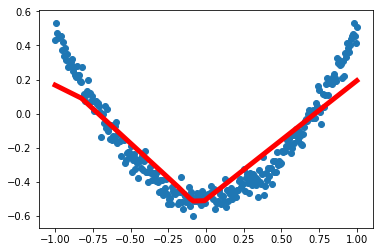

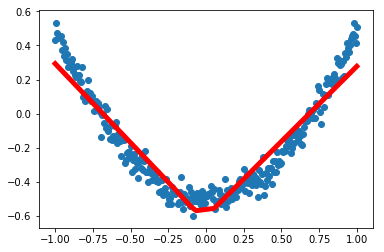

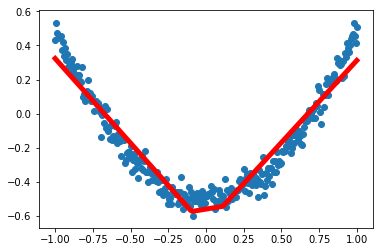

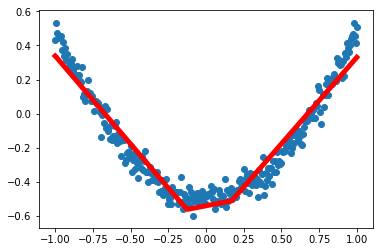

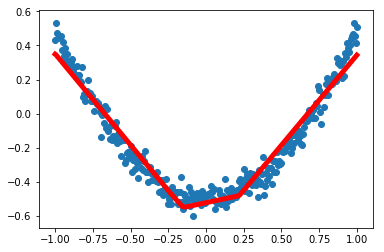

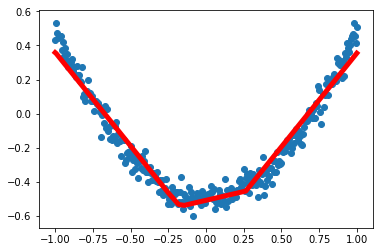

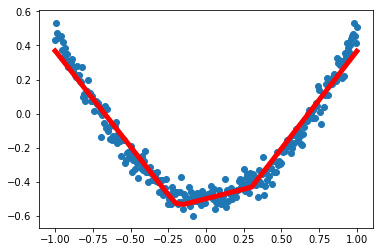

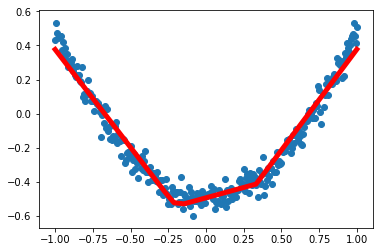

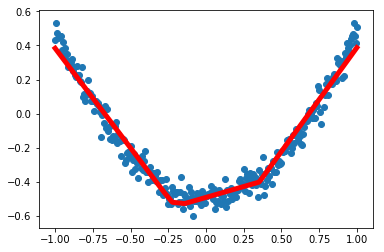

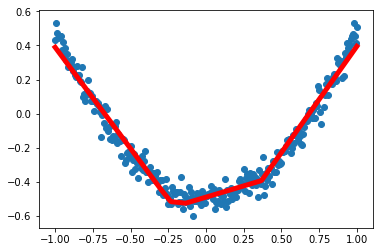

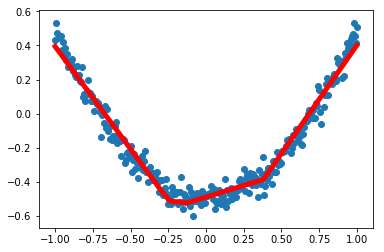

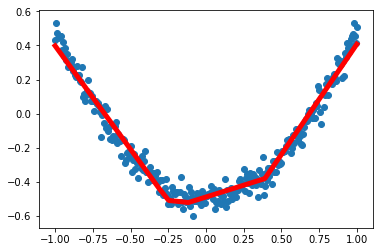

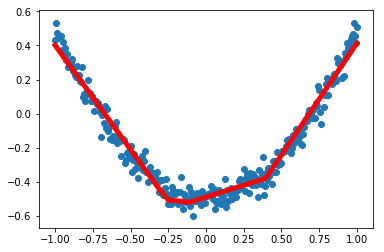

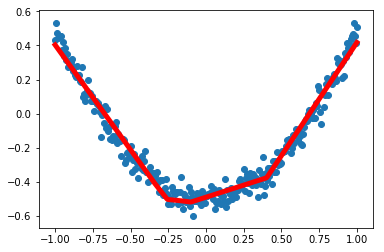

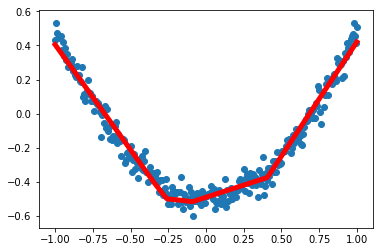

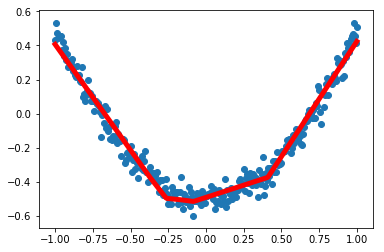

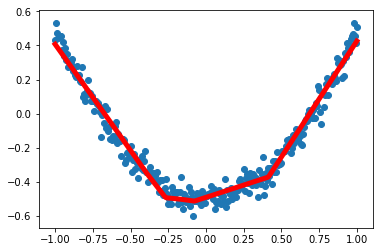

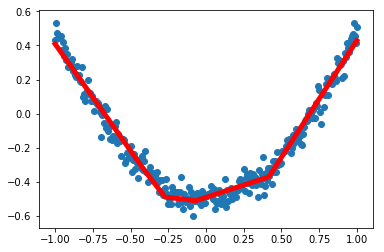

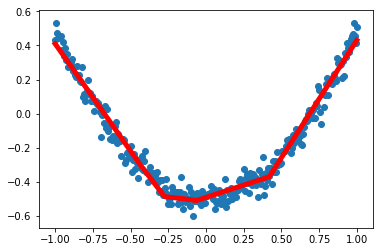

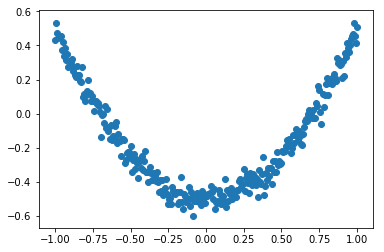

In [16]:
sess = tf.Session()
sess.run(init)

# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.scatter(x_data, y_data)
# plt.ion()
# plt.show()

for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i%50 == 0:
#         print(sess.run(loss, feed_dict={xs:x_data, ys:y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        # 对结果进行可视化
        predition_value = sess.run(predition, feed_dict={xs:x_data})
        lines = ax.plot(x_data, predition_value, 'r', lw=5)
        plt.pause(0.1)
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.scatter(x_data, y_data)
plt.ion()  # 多个图
plt.show()